In [166]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

 Q1. Perform basic EDA

In [21]:
data=pd.read_csv("D:\\dsml\\ML\\New folder\\house_price.csv")

In [77]:
data

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13194,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,6530
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB


In [27]:
data.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [31]:
data.isnull().sum()

location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64

In [35]:
data.duplicated().sum()

1049

Removing duplicates

In [39]:
data = data.drop_duplicates()

In [41]:
data.duplicated().sum()

0

Q2. Detect the outliers using following methods and remove it using methods like trimming / capping/ imputation using mean or median

 a) Mean and Standard deviation

In [83]:
d=data['price_per_sqft']

In [47]:
mean=data['price_per_sqft'].mean()

In [51]:
std=data['price_per_sqft'].std()

In [53]:
mean

8132.641840177763

In [55]:
std

111232.9008957087

In [59]:
lowerb=mean-(3*std)
upperb=mean+(3*std)

In [73]:
data_mean_std=data[(data['price_per_sqft']<=upperb)&(data['price_per_sqft']>=lowerb)]

In [75]:
data_mean_std

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13194,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,6530
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258


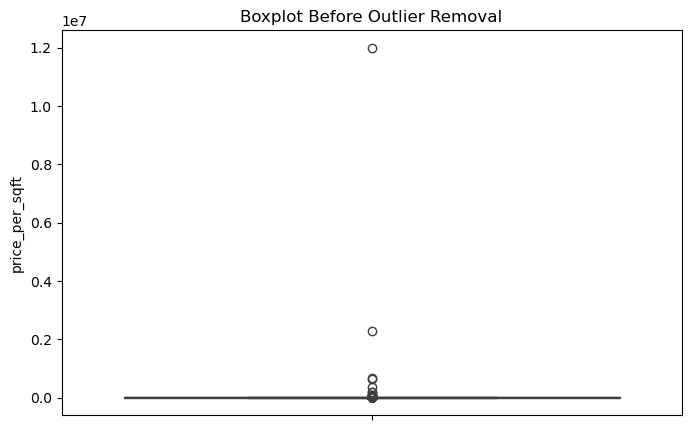

In [89]:
plt.figure(figsize=(8,5))
sns.boxplot(y=data['price_per_sqft'])
plt.title("Boxplot Before Outlier Removal")
plt.show()


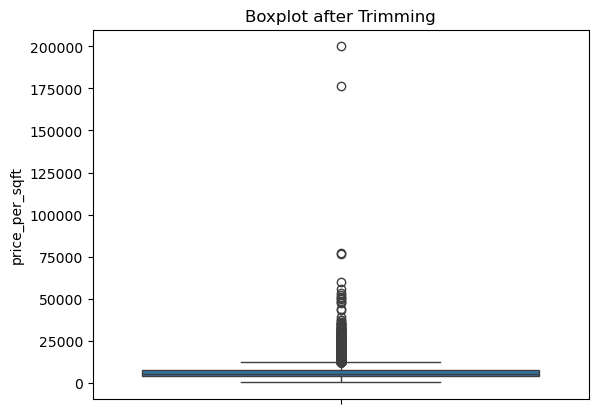

In [99]:
sns.boxplot(y=data_mean_std['price_per_sqft'])
plt.title("Boxplot after Trimming")
plt.show()

b)Percentile method 

In [109]:
lp=data['price_per_sqft'].quantile(0.05)
up=data['price_per_sqft'].quantile(0.95)

In [128]:
t = np.where(data['price_per_sqft'] < lp, lp,
             np.where(data['price_per_sqft'] > up, up, data['price_per_sqft']))


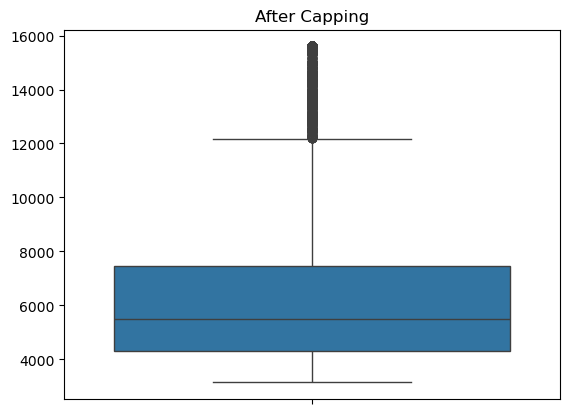

In [158]:
sns.boxplot(y=t)
plt.title("After Capping")
plt.show()

c)IQR(Inter quartile range method)

In [138]:
q1=data['price_per_sqft'].quantile(0.25)
q3=data['price_per_sqft'].quantile(0.75)

In [140]:
iqr=q3-q1

In [146]:
low=q1-(1.5*iqr)
upr=q3+(1.5*iqr)

In [207]:
e=np.where(data['price_per_sqft']>upr,data['price_per_sqft'].mean(),np.where(data['price_per_sqft']>upr,data['price_per_sqft'].mean(),data['price_per_sqft']))

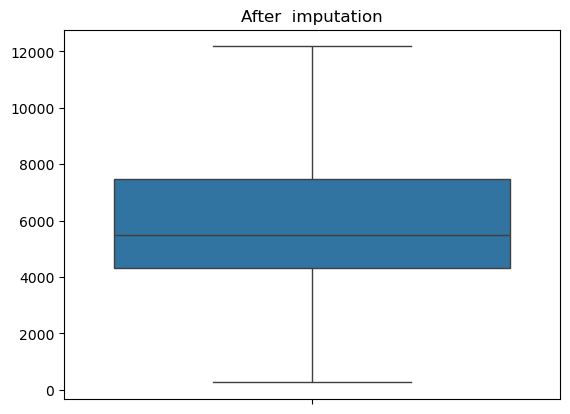

In [211]:
sns.boxplot(y=e)
plt.title("After  imputation")
plt.show()

d) Z Score method

In [172]:
data_copy = data.copy()

In [174]:
data_copy['z_score'] = zscore(data_copy['price_per_sqft'])

In [176]:
data_zscore = data_copy[abs(data_copy['z_score']) < 3]

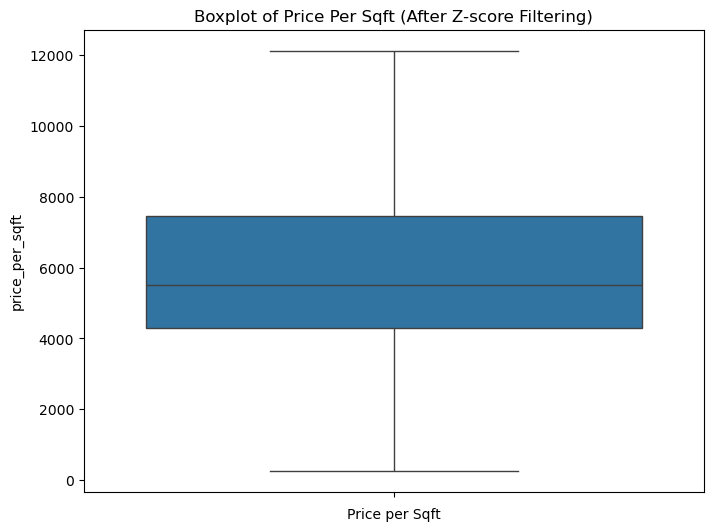

In [191]:

plt.figure(figsize=(8, 6))
sns.boxplot(data=data_zscore, y='price_per_sqft')
plt.title('Boxplot of Price Per Sqft (After Z-score Filtering)')
plt.xlabel('Price per Sqft')
plt.show()


 Q3. Create a box plot and use this to determine which method seems to work best to remove outliers for this data? 

we had already created boxplot after detail looking replaceing with mean max cause increase of that specific values so trim is kind better for this data i guess

Q4. Draw histplot to check the normality of the column(price per sqft column) and perform transformations if needed. Check the skewness and kurtosis before and after the transformation.

In [315]:
data_mean_std['price_per_sqft'].skew()

10.522738553105086

In [317]:
data_mean_std['price_per_sqft'].kurt()

310.091598033416

<Axes: xlabel='price_per_sqft', ylabel='Count'>

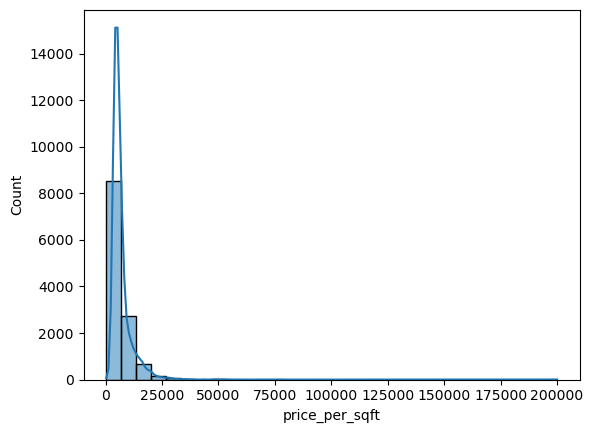

In [325]:
sns.histplot(data=data_mean_std['price_per_sqft'],bins=30,kde=True)

In [307]:
q = np.log1p(data_mean_std['price_per_sqft'])

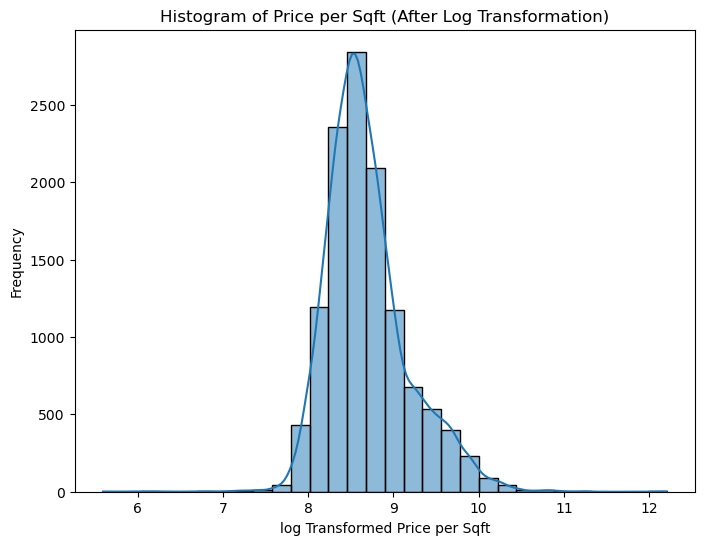

In [321]:
plt.figure(figsize=(8, 6))
sns.histplot(data=q, bins=30, kde=True)
plt.title('Histogram of Price per Sqft (After Log Transformation)')
plt.xlabel('log Transformed Price per Sqft')
plt.ylabel('Frequency')
plt.show()

In [311]:
q.skew()

0.8484107741516802

In [319]:
q.kurt()

1.8544041876851924

Q5. Check the correlation between all the numerical columns and plot heatmap

In [349]:
numeric_data = data.select_dtypes(include=['number'])

In [351]:
correlation_matrix = numeric_data.corr()

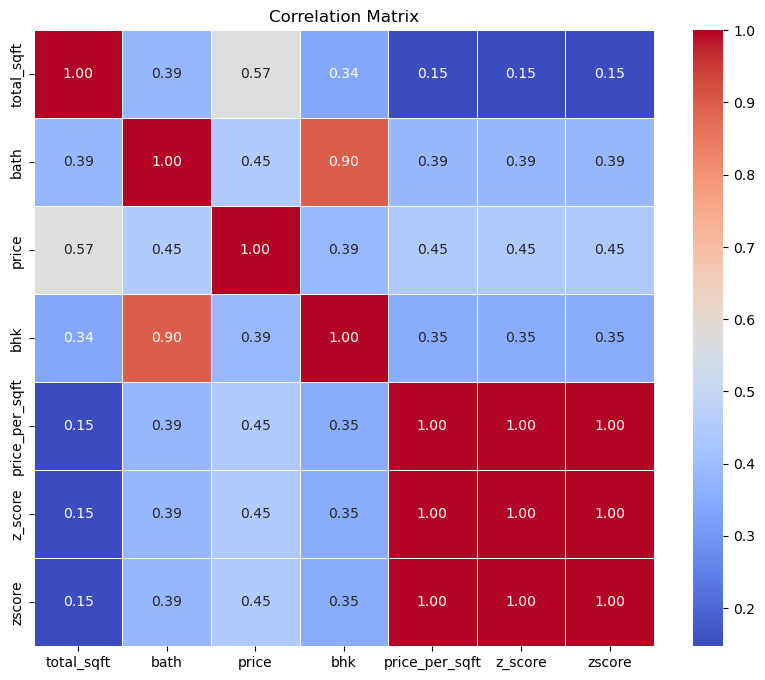

In [361]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

Q6. Draw Scatter plot between the variables to check the correlation between them

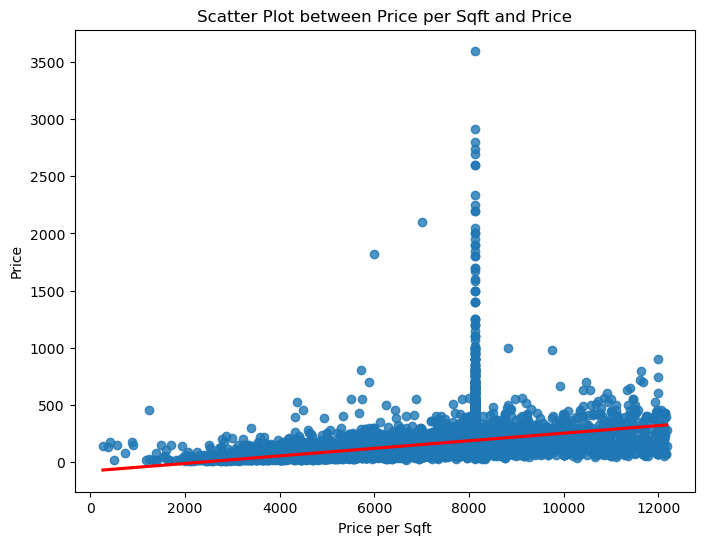

In [391]:
plt.figure(figsize=(8, 6))
sns.regplot(x=data['price_per_sqft'], y=data['price'], line_kws={'color': 'red'})
plt.title('Scatter Plot between Price per Sqft and Price')
plt.xlabel('Price per Sqft')
plt.ylabel('Price')
plt.show()